    Fase 1: Exploración y Limpieza

    Exploración Inicial:

    Realiza una exploración inicial de los datos para identificar posibles problemas, como valores
    nulos, atípicos o datos faltantes en las columnas relevantes.

    Utiliza funciones de Pandas para obtener información sobre la estructura de los datos, la
    presencia de valores nulos y estadísticas básicas de las columnas involucradas.
 
    Une los dos conjuntos de datos de la forma más eficiente

In [1]:
# Importamos las bibliotecas necesarias
import pandas as pd
import numpy as np

import scipy.stats as stats
from scipy.stats import shapiro, poisson, chisquare, expon, kstest
from scipy.stats import shapiro, levene
from scipy.stats import ttest_ind
from scipy.stats import mannwhitneyu
from scipy.stats import chi2_contingency

import seaborn as sns
import matplotlib.pyplot as plt


pd.set_option('display.max_columns', None)

In [2]:
# Cargar el archivo Customer Flight Activity.csv
df_flight_data = pd.read_csv("Data/Customer Flight Activity.csv", header=0)
df_flight_data.head()

,Loyalty Number,Year,Month,Flights Booked,Flights with Companions,Total Flights,Distance,Points Accumulated,Points Redeemed,Dollar Cost Points Redeemed
0,100018,2017,1,3,0,3,1521,152.0,0,0
1,100102,2017,1,10,4,14,2030,203.0,0,0
2,100140,2017,1,6,0,6,1200,120.0,0,0
3,100214,2017,1,0,0,0,0,0.0,0,0
4,100272,2017,1,0,0,0,0,0.0,0,0


In [3]:

df_loyalty_data = pd.read_csv("Data/Customer Loyalty History.csv", header=0)
df_loyalty_data.head()

,Loyalty Number,Country,Province,City,Postal Code,Gender,Education,Salary,Marital Status,Loyalty Card,CLV,Enrollment Type,Enrollment Year,Enrollment Month,Cancellation Year,Cancellation Month
0,480934,Canada,Ontario,Toronto,M2Z 4K1,Female,Bachelor,83236.0,Married,Star,3839.14,Standard,2016,2,NaN,NaN
1,549612,Canada,Alberta,Edmonton,T3G 6Y6,Male,College,NaN,Divorced,Star,3839.61,Standard,2016,3,NaN,NaN
2,429460,Canada,British Columbia,Vancouver,V6E 3D9,Male,College,NaN,Single,Star,3839.75,Standard,2014,7,2018.0,1.0
3,608370,Canada,Ontario,Toronto,P1W 1K4,Male,College,NaN,Single,Star,3839.75,Standard,2013,2,NaN,NaN
4,530508,Canada,Quebec,Hull,J8Y 3Z5,Male,Bachelor,103495.0,Married,Star,3842.79,Standard,2014,10,NaN,NaN


In [4]:
#Exploramos la información básica del archivo de vuelos

# Información básica del archivo
print("\nInformación del conjunto de datos de vuelos:")
df_flight_data.info()


Información del conjunto de datos de vuelos:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 405624 entries, 0 to 405623
Data columns (total 10 columns):
 #   Column                       Non-Null Count   Dtype  
---  ------                       --------------   -----  
 0   Loyalty Number               405624 non-null  int64  
 1   Year                         405624 non-null  int64  
 2   Month                        405624 non-null  int64  
 3   Flights Booked               405624 non-null  int64  
 4   Flights with Companions      405624 non-null  int64  
 5   Total Flights                405624 non-null  int64  
 6   Distance                     405624 non-null  int64  
 7   Points Accumulated           405624 non-null  float64
 8   Points Redeemed              405624 non-null  int64  
 9   Dollar Cost Points Redeemed  405624 non-null  int64  
dtypes: float64(1), int64(9)
memory usage: 30.9 MB


In [5]:
#Exploramos la información básica del archivo de lealtad

# Información básica del archivo
print("\nInformación del conjunto de datos de vuelos:")
df_loyalty_data.info()


Información del conjunto de datos de vuelos:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 16737 entries, 0 to 16736
Data columns (total 16 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   Loyalty Number      16737 non-null  int64  
 1   Country             16737 non-null  object 
 2   Province            16737 non-null  object 
 3   City                16737 non-null  object 
 4   Postal Code         16737 non-null  object 
 5   Gender              16737 non-null  object 
 6   Education           16737 non-null  object 
 7   Salary              12499 non-null  float64
 8   Marital Status      16737 non-null  object 
 9   Loyalty Card        16737 non-null  object 
 10  CLV                 16737 non-null  float64
 11  Enrollment Type     16737 non-null  object 
 12  Enrollment Year     16737 non-null  int64  
 13  Enrollment Month    16737 non-null  int64  
 14  Cancellation Year   2067 non-null   float64
 15  Cancell

In [6]:
#Exploramos el número de filas y columnas de nuestro df de vuelos
df_flight_data.shape

(405624, 10)

In [7]:
df_flight_data.columns

Index(['Loyalty Number', 'Year', 'Month', 'Flights Booked',
       'Flights with Companions', 'Total Flights', 'Distance',
       'Points Accumulated', 'Points Redeemed', 'Dollar Cost Points Redeemed'],
      dtype='object')

In [8]:
#Exploramos el número de filas y columnas de nuestro df de lealtad.
df_loyalty_data.shape

(16737, 16)

In [9]:
df_loyalty_data.columns

Index(['Loyalty Number', 'Country', 'Province', 'City', 'Postal Code',
       'Gender', 'Education', 'Salary', 'Marital Status', 'Loyalty Card',
       'CLV', 'Enrollment Type', 'Enrollment Year', 'Enrollment Month',
       'Cancellation Year', 'Cancellation Month'],
      dtype='object')

In [10]:
print("\nEstadísticas básicas del conjunto de actividad de vuelos:")
df_flight_data.describe().T


Estadísticas básicas del conjunto de actividad de vuelos:


,count,mean,std,min,25%,50%,75%,max
Loyalty Number,405624.0,550037.873084,258935.286969,100018.0,326961.00,550834.0,772194.00,999986.0
Year,405624.0,2017.500000,0.500001,2017.0,2017.00,2017.5,2018.00,2018.0
Month,405624.0,6.500000,3.452057,1.0,3.75,6.5,9.25,12.0
Flights Booked,405624.0,4.115052,5.225518,0.0,0.00,1.0,8.00,21.0
Flights with Companions,405624.0,1.031805,2.076869,0.0,0.00,0.0,1.00,11.0
Total Flights,405624.0,5.146858,6.521227,0.0,0.00,1.0,10.00,32.0
Distance,405624.0,1208.880059,1433.155320,0.0,0.00,488.0,2336.00,6293.0
Points Accumulated,405624.0,123.692721,146.599831,0.0,0.00,50.0,239.00,676.5
Points Redeemed,405624.0,30.696872,125.486049,0.0,0.00,0.0,0.00,876.0
Dollar Cost Points Redeemed,405624.0,2.484503,10.150038,0.0,0.00,0.0,0.00,71.0


In [11]:
print("\nEstadísticas básicas del conjunto del historial lealtad:")
df_loyalty_data.describe().T


Estadísticas básicas del conjunto del historial lealtad:


,count,mean,std,min,25%,50%,75%,max
Loyalty Number,16737.0,549735.880445,258912.132453,100018.00,326603.00,550434.00,772019.00,999986.00
Salary,12499.0,79245.609409,35008.297285,-58486.00,59246.50,73455.00,88517.50,407228.00
CLV,16737.0,7988.896536,6860.982280,1898.01,3980.84,5780.18,8940.58,83325.38
Enrollment Year,16737.0,2015.253211,1.979111,2012.00,2014.00,2015.00,2017.00,2018.00
Enrollment Month,16737.0,6.669116,3.398958,1.00,4.00,7.00,10.00,12.00
Cancellation Year,2067.0,2016.503145,1.380743,2013.00,2016.00,2017.00,2018.00,2018.00
Cancellation Month,2067.0,6.962748,3.455297,1.00,4.00,7.00,10.00,12.00


In [12]:
# Identificamos posibles valores nulos
# Observamos que no hay valores nulos

print("\nValores nulos en el conjunto de vuelos:")
df_flight_data.isnull().sum()/df_flight_data.shape[0]*100


Valores nulos en el conjunto de vuelos:


Loyalty Number                 0.0
Year                           0.0
Month                          0.0
Flights Booked                 0.0
Flights with Companions        0.0
Total Flights                  0.0
Distance                       0.0
Points Accumulated             0.0
Points Redeemed                0.0
Dollar Cost Points Redeemed    0.0
dtype: float64

In [13]:
# Identificamos posibles valores nulos
# Observamos que existen valores nulos en las columnas de Salary, Cancellation Year y Cancellation Month.

print("\nValores nulos en el conjunto de lealtad:")
df_loyalty_data.isnull().sum()/df_loyalty_data.shape[0]*100


Valores nulos en el conjunto de lealtad:


Loyalty Number         0.000000
Country                0.000000
Province               0.000000
City                   0.000000
Postal Code            0.000000
Gender                 0.000000
Education              0.000000
Salary                25.321145
Marital Status         0.000000
Loyalty Card           0.000000
CLV                    0.000000
Enrollment Type        0.000000
Enrollment Year        0.000000
Enrollment Month       0.000000
Cancellation Year     87.650117
Cancellation Month    87.650117
dtype: float64

Solo existen datos nulos en el segundo DataFrame.

La existencia de datos nulos en las columnas correspondientes al mes y año de cancelación puede indicarnos que esos clientes siguen dados de alta en el programa de fidelización. 

Además, observamos la existencia de datos nulos en la columna Salary . Más adelante analizaremos esta columna más en produndidad para determinar como imputaremos esos valores nulos

------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------

En la exploración observamos una columna común en ambos DataFrames, Loyalty Number, que representa un indicador único por cada cliente. por lo que vamos a analizarla más en profundidad.

Aquí vemos que hay duplicados en el Loyalty Number, pero unicamente en el primer DataFrame con la información referente a los datos de vuelos. 

El segundo DataFrame, no contiene duplicados en esta columna

In [14]:
print(df_flight_data['Loyalty Number'].duplicated().sum())  # Número de duplicados en df_flight_data
print(df_loyalty_data['Loyalty Number'].duplicated().sum())

388887
0


Vamos a extraer los valores únicos.

In [15]:
# Contamos los valores únicos de la columna 'Loyalty Number' en cada DataFrame
unique_flight_data = len(df_flight_data['Loyalty Number'].unique())
unique_loyalty_data = len(df_loyalty_data['Loyalty Number'].unique())

# Mostramos los resultados
print(f"Valores únicos en df_flight_data: {unique_flight_data}")
print(f"Valores únicos en df_loyalty_history: {unique_loyalty_data}")

Valores únicos en df_flight_data: 16737
Valores únicos en df_loyalty_history: 16737


La cantidad de valores únicos coinciden en ambos Dataframes. 

Vamos a omprobar si son los mismos valores únicos en ambos Dataframes

In [16]:
# Obtener los valores únicos de 'Loyalty Number' en ambos DataFrames
unique_values_flight = df_flight_data['Loyalty Number'].unique().tolist()
unique_values_loyalty = df_loyalty_data['Loyalty Number'].unique().tolist()

print(unique_values_flight)
print(unique_values_loyalty)

[100018, 100102, 100140, 100214, 100272, 100301, 100364, 100380, 100428, 100504, 100550, 863070, 100590, 100642, 100644, 100646, 100727, 100737, 100753, 100816, 100853, 100883, 100890, 101018, 101148, 101356, 101363, 691626, 101515, 101540, 101544, 101547, 101581, 101594, 101644, 101663, 101664, 101768, 101895, 101902, 101945, 102168, 102184, 102207, 102299, 102308, 102311, 102376, 102464, 102615, 102726, 102730, 102740, 102788, 159942, 102877, 102982, 103043, 103151, 103217, 103304, 103340, 103352, 103359, 103362, 103383, 103436, 103490, 103502, 103536, 103699, 103731, 103758, 103823, 103860, 103862, 103916, 103969, 103970, 103975, 103985, 104103, 104267, 104353, 627915, 104586, 104673, 104732, 104739, 104849, 104960, 105063, 105073, 105074, 105145, 105193, 105214, 471706, 105352, 105552, 105688, 105700, 105712, 105789, 105835, 105841, 105921, 105932, 105992, 106001, 106037, 106038, 106046, 106048, 107119, 106397, 106444, 106477, 106589, 106592, 106616, 106623, 106637, 106689, 516133,

In [17]:
# Comprobamos si todos los valores únicos de df_flight_data están en df_loyalty_data
all_in_loyalty = all(pd.Series(unique_values_flight).isin(unique_values_loyalty))

# Comprobamos si todos los valores únicos de df_loyalty_data están en df_flight_data
all_in_flight = all(pd.Series(unique_values_loyalty).isin(unique_values_flight))

# Mostrar resultados
print(f"Todos los valores únicos de df_flight_data están en df_loyalty_data: {all_in_loyalty}")
print(f"Todos los valores únicos de df_loyalty_data están en df_flight_data: {all_in_flight}")

Todos los valores únicos de df_flight_data están en df_loyalty_data: True
Todos los valores únicos de df_loyalty_data están en df_flight_data: True


Los valores únicos son los mismos en ambos Df.


In [18]:
# Revisamos si hay valores nulos en la columna 'loyalty_number' en ambos DataFrames
print(df_flight_data['Loyalty Number'].isnull().sum())  # Nulos en df_flight_data
print(df_loyalty_data['Loyalty Number'].isnull().sum())  # Nulos en df_loyalty_data

0
0


 Visualizamos los nombres de las columnas de ambos conjuntos de datos para entender su estructura y comprobar si los nombres de las columnas son coherentes (homogéneos)

 Esto nos permitirá identificar posibles diferencias en los nombres, inconsistencias o información redundante que deba ser tratada antes de fusionar los datasets.

 En este caso, los nombres de las columnas son homogéneos.

In [19]:
print(df_flight_data.columns.tolist())
print(df_loyalty_data.columns.tolist())

['Loyalty Number', 'Year', 'Month', 'Flights Booked', 'Flights with Companions', 'Total Flights', 'Distance', 'Points Accumulated', 'Points Redeemed', 'Dollar Cost Points Redeemed']
['Loyalty Number', 'Country', 'Province', 'City', 'Postal Code', 'Gender', 'Education', 'Salary', 'Marital Status', 'Loyalty Card', 'CLV', 'Enrollment Type', 'Enrollment Year', 'Enrollment Month', 'Cancellation Year', 'Cancellation Month']


** Unimos ambas tablas usando la columna clave ' Loyalty Number' 

Un left merge podría ser útlil para mantener todos los registros del DataFrame izquierdo que tiene información de vuelos, incluso si no hay una coincidencia en el DataFrame derecho,que tiene información de los perfiles de los clientes. 
Pero acabamos de comprobar que no es el caso, puesto que todos los valores únicos del dataframe izquierdo, se encuentran también en el derecho.


Por lo tanto, usaremos un inner merge , ya que no esperamos valores nulos y mantendremos los valores duplicados en 'loyalty_number' en el primer df, ya que son importantes para nuestro análisis porque cada uno nos está aportando los datos de vuelos de un mes y año diferente.

In [20]:

# Hacemos la unión con un merge, ya que así aseguramos que los datos se combinen correctamente usando columnas clave (en este caso, loyalty_number).
# Hremos left merge para mantener todos los registros del DataFrame izquierdo que tiene información de vuelos, incluso si no hay una coincidencia en el DataFrame derecho,que tiene información de los perfiles de los clientes. Si un cliente no tiene información asociada en el archivo de Customer Loyalty History, aún se incluirá en el resultado, pero las columnas de de df_loyalty_data tendrán valores nulos.
# Unir los dos conjuntos de datos usando la columna común 'Loyalty Number'
df_merged = pd.merge(df_flight_data, df_loyalty_data, on='Loyalty Number', how='inner')

print("\nInformación del conjunto de datos combinado:")
df_merged.info()  # Resumen general del conjunto combinado

print(df_merged.shape) 


Información del conjunto de datos combinado:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 405624 entries, 0 to 405623
Data columns (total 25 columns):
 #   Column                       Non-Null Count   Dtype  
---  ------                       --------------   -----  
 0   Loyalty Number               405624 non-null  int64  
 1   Year                         405624 non-null  int64  
 2   Month                        405624 non-null  int64  
 3   Flights Booked               405624 non-null  int64  
 4   Flights with Companions      405624 non-null  int64  
 5   Total Flights                405624 non-null  int64  
 6   Distance                     405624 non-null  int64  
 7   Points Accumulated           405624 non-null  float64
 8   Points Redeemed              405624 non-null  int64  
 9   Dollar Cost Points Redeemed  405624 non-null  int64  
 10  Country                      405624 non-null  object 
 11  Province                     405624 non-null  object 
 12  City        

    FASE 2
 
    Limpieza de Datos:

    - Elimina o trata los valores nulos, si los hay, en las columnas clave para asegurar que los datos
    estén completos.

    - Verifica la consistencia y corrección de los datos para asegurarte de que los datos se
    presenten de forma coherente.

    - Realiza cualquier ajuste o conversión necesaria en las columnas (por ejemplo, cambiar tipos de
    datos) para garantizar la adecuación de los datos para el análisis estadístico.

--------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------

In [21]:
df_merged.head()

,Loyalty Number,Year,Month,Flights Booked,Flights with Companions,Total Flights,Distance,Points Accumulated,Points Redeemed,Dollar Cost Points Redeemed,Country,Province,City,Postal Code,Gender,Education,Salary,Marital Status,Loyalty Card,CLV,Enrollment Type,Enrollment Year,Enrollment Month,Cancellation Year,Cancellation Month
0,100018,2017,1,3,0,3,1521,152.0,0,0,Canada,Alberta,Edmonton,T9G 1W3,Female,Bachelor,92552.0,Married,Aurora,7919.20,Standard,2016,8,NaN,NaN
1,100102,2017,1,10,4,14,2030,203.0,0,0,Canada,Ontario,Toronto,M1R 4K3,Male,College,NaN,Single,Nova,2887.74,Standard,2013,3,NaN,NaN
2,100140,2017,1,6,0,6,1200,120.0,0,0,Canada,British Columbia,Dawson Creek,U5I 4F1,Female,College,NaN,Divorced,Nova,2838.07,Standard,2016,7,NaN,NaN
3,100214,2017,1,0,0,0,0,0.0,0,0,Canada,British Columbia,Vancouver,V5R 1W3,Male,Bachelor,63253.0,Married,Star,4170.57,Standard,2015,8,NaN,NaN
4,100272,2017,1,0,0,0,0,0.0,0,0,Canada,Ontario,Toronto,P1L 8X8,Female,Bachelor,91163.0,Divorced,Star,6622.05,Standard,2014,1,NaN,NaN


Comprobamos que no hay valores nulos tras el left merge.

In [22]:
# Nulos en la columna clave
nulos_loyalty_num= df_merged[['Loyalty Number']].isnull().sum()

# Imprimir el número de valores nulos en esa columna
print(f"Valores nulos en la columna clave: {nulos_loyalty_num }")

Valores nulos en la columna clave: Loyalty Number    0
dtype: int64


Comprobamos que mantenemos todos los duplicados que queriamos conservar con el left merge

In [23]:
print(df_merged['Loyalty Number'].duplicated().sum())  


388887


In [24]:
# Verificamos que el número total de filas después del merge coincida con lo esperado
print(df_merged.info())


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 405624 entries, 0 to 405623
Data columns (total 25 columns):
 #   Column                       Non-Null Count   Dtype  
---  ------                       --------------   -----  
 0   Loyalty Number               405624 non-null  int64  
 1   Year                         405624 non-null  int64  
 2   Month                        405624 non-null  int64  
 3   Flights Booked               405624 non-null  int64  
 4   Flights with Companions      405624 non-null  int64  
 5   Total Flights                405624 non-null  int64  
 6   Distance                     405624 non-null  int64  
 7   Points Accumulated           405624 non-null  float64
 8   Points Redeemed              405624 non-null  int64  
 9   Dollar Cost Points Redeemed  405624 non-null  int64  
 10  Country                      405624 non-null  object 
 11  Province                     405624 non-null  object 
 12  City                         405624 non-null  object 
 13 

In [25]:
# comprobamos que seguimos teniendo los mismos valores nulos que contenía el segundo df. 
print("\nValores nulos en el DF:")
df_merged.isnull().sum()/df_merged.shape[0]*100


Valores nulos en el DF:


Loyalty Number                  0.000000
Year                            0.000000
Month                           0.000000
Flights Booked                  0.000000
Flights with Companions         0.000000
Total Flights                   0.000000
Distance                        0.000000
Points Accumulated              0.000000
Points Redeemed                 0.000000
Dollar Cost Points Redeemed     0.000000
Country                         0.000000
Province                        0.000000
City                            0.000000
Postal Code                     0.000000
Gender                          0.000000
Education                       0.000000
Salary                         25.312112
Marital Status                  0.000000
Loyalty Card                    0.000000
CLV                             0.000000
Enrollment Type                 0.000000
Enrollment Year                 0.000000
Enrollment Month                0.000000
Cancellation Year              87.657535
Cancellation Mon

In [26]:
# Nulos en la columna 'Salary'
null_salary = df_merged[['Salary']].isnull().sum()

# Imprimir valores nulos en 'Cancellation Year'
print(f"\nValores nulos en la columna 'Salary': {null_salary.values[0]}")

# Nulos en la columna 'Cancellation Year'
null_canc_year = df_merged[['Cancellation Year']].isnull().sum()

# Imprimir valores nulos en 'Cancellation Year'
print(f"\nValores nulos en la columna 'Cancellation Year': {null_canc_year.values[0]}")

# Nulos en la columna 'Cancellation Month'
null_canc_month = df_merged[['Cancellation Month']].isnull().sum()

# Imprimir valores nulos en 'Cancellation Month'
print(f"\nValores nulos en la columna 'Cancellation Month': {null_canc_month.values[0]}")


Valores nulos en la columna 'Salary': 102672

Valores nulos en la columna 'Cancellation Year': 355560

Valores nulos en la columna 'Cancellation Month': 355560


Vamos a analizar la columna Salary para gestionar esos nulos.

In [27]:
print(df_merged[['Salary']].describe())

              Salary
count  302952.000000
mean    79268.825953
std     34992.133508
min    -58486.000000
25%     59262.000000
50%     73479.000000
75%     88612.000000
max    407228.000000


Observamos valores negativos, vamos a analizar más en profundidad esos valores.

In [28]:
neg_salary = df_merged[df_merged['Salary'] < 0]['Salary']
neg_salary

293      -10605.0
961      -58486.0
1740     -31911.0
2111     -49001.0
2464     -46683.0
           ...   
400664   -46303.0
401739   -34079.0
403876   -57297.0
404318   -17534.0
404881   -12497.0
Name: Salary, Length: 480, dtype: float64

In [29]:
neg_salary.unique()

array([-10605., -58486., -31911., -49001., -46683., -47310., -39503.,
        -9081., -17534., -43234., -45962., -49830., -19325., -19332.,
       -46303., -34079., -57297., -12497., -26322., -46470.])

Visualicemos la distribución de los salarios para determinar como gestionar los valores nulos con un Histograma.

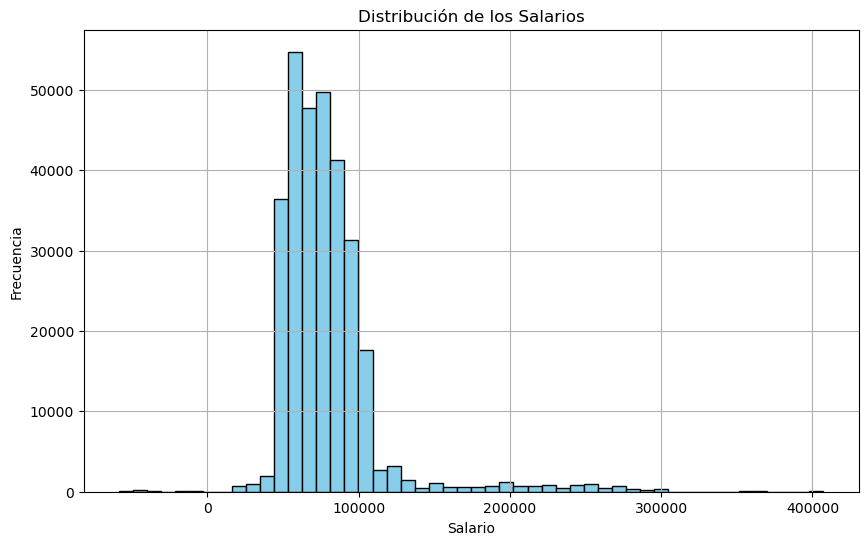

In [35]:
# Visualizar la distribución de los salarios para determinar como gestionar los valores nulos.
plt.figure(figsize=(10,6))
df_merged['Salary'].hist(bins=50, color='skyblue', edgecolor='black')
plt.title('Distribución de los Salarios')
plt.xlabel('Salario')
plt.ylabel('Frecuencia')
plt.show()

En la distribución de los salarios vemos una fuerte asimetría hacía la derecha, lo que sugiere que la mayoría de los salarios se encuentran en un rango relativamente bajo, con algunos salarios muy altos (outliers) hacia la derecha. 

Veamos los datos ahora con  un Bloxpot.

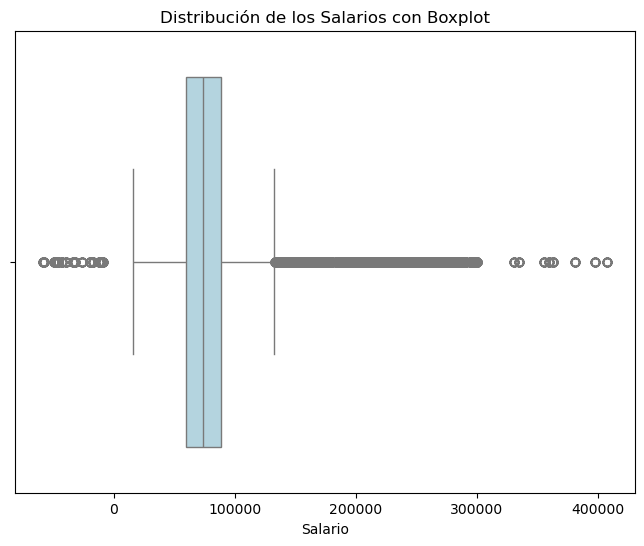

In [36]:

# Crear el boxplot para visualizar los salarios
plt.figure(figsize=(8, 6))
sns.boxplot(x=df_merged['Salary'], color='lightblue')

# Agregar título y etiquetas
plt.title('Distribución de los Salarios con Boxplot')
plt.xlabel('Salario')

# Mostrar el gráfico
plt.show()

Aquí podemos visualizar mejor la distribución de los salarios, especialmente los valores atípicos (outliers) que se encuentran fuera de los "bigotes" del boxplot. 

Estos valores pueden distorsionar el análisis , por lo que vamos a imputar los valores nulos con la mediana, ya que el IQR es moderado y no muy grande. Esto indica que los salarios en el 50% central de la distribución no están extremadamente dispersos. Es una dispersión razonable en comparación con el rango completo de salarios. 


*Caja: Representa el rango intercuartílico (IQR), es decir, entre el primer cuartil (Q1, el 25%) y el tercer cuartil (Q3, el 75%).

*Línea dentro de la caja: Es la mediana de los salarios.

*Bigotes: Representan el rango de los datos, normalmente hasta 1.5 veces el IQR, más allá de lo cual se consideran valores atípicos.

*Puntos fuera de los bigotes: Son los outliers, o valores extremos.

---------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------

Fijémonos ahora en los duplicados: 

In [37]:
# Contar el número total de filas duplicadas (excluyendo la primera aparición de cada duplicado)
duplicados = df_merged.duplicated().sum()
print(f"Total de filas duplicadas: {duplicados}")

Total de filas duplicadas: 1864


In [38]:
# Ver las filas duplicadas (sin excluir la primera aparición)
duplicados_filas = df_merged[df_merged.duplicated()]
duplicados_filas

,Loyalty Number,Year,Month,Flights Booked,Flights with Companions,Total Flights,Distance,Points Accumulated,Points Redeemed,Dollar Cost Points Redeemed,Country,Province,City,Postal Code,Gender,Education,Salary,Marital Status,Loyalty Card,CLV,Enrollment Type,Enrollment Year,Enrollment Month,Cancellation Year,Cancellation Month
42,101902,2017,1,0,0,0,0,0.0,0,0,Canada,Ontario,London,M5B 3E4,Female,College,NaN,Married,Aurora,6265.34,Standard,2017,1,NaN,NaN
227,112142,2017,1,0,0,0,0,0.0,0,0,Canada,Ontario,Thunder Bay,K8T 5M5,Male,Bachelor,93073.0,Single,Aurora,16272.74,Standard,2015,7,NaN,NaN
478,126100,2017,1,0,0,0,0,0.0,0,0,Canada,New Brunswick,Fredericton,E3B 2H2,Female,Master,121261.0,Divorced,Nova,17790.41,Standard,2013,11,2014.0,7.0
567,130331,2017,1,0,0,0,0,0.0,0,0,Canada,Nova Scotia,Halifax,B3J 9S2,Female,Bachelor,79207.0,Divorced,Nova,2862.73,Standard,2016,12,NaN,NaN
660,135421,2017,1,0,0,0,0,0.0,0,0,Canada,Nova Scotia,Halifax,B3C 2M8,Female,Bachelor,91156.0,Married,Aurora,17441.64,Standard,2017,1,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
404668,949628,2018,12,0,0,0,0,0.0,0,0,Canada,Saskatchewan,Regina,S6J 3G0,Female,College,NaN,Married,Star,2563.58,Standard,2012,7,NaN,NaN
404884,960050,2018,12,0,0,0,0,0.0,0,0,Canada,Ontario,Thunder Bay,K8T 5M5,Female,Bachelor,103151.0,Single,Aurora,8622.84,Standard,2015,12,NaN,NaN
405111,971370,2018,12,0,0,0,0,0.0,0,0,Canada,Ontario,Toronto,P2T 6G3,Male,Bachelor,63791.0,Married,Aurora,5261.04,Standard,2012,7,NaN,NaN
405410,988392,2018,12,0,0,0,0,0.0,0,0,Canada,British Columbia,Vancouver,V6E 3D9,Male,College,NaN,Single,Aurora,9022.08,Standard,2012,5,NaN,NaN


Tras esta comprensión de los datos : 

- Entendemos que como no puede existir un salario negativo, el valor se debe a una errata en la introducción del dato, por lo que los convertiremos en numeros positivos.
- Imputamos los valores faltantes en salary con la mediana
- Eliminamos las filas duplicadas

In [39]:
#Creamos función para la limpieza y transformación de estos datos.


def limpiar_y_transformar_datos(df):
    """
    Realiza las operaciones de limpieza y transformación necesarias en el dataset combinado.

    Parámetros:
        df (DataFrame): El DataFrame combinado que contiene los datos de vuelos y lealtad.

    Retorno:
        DataFrame: El DataFrame transformado y limpio.
    """
    # Corregir valores negativos en la columna 'Salary' transformándolos a valores absolutos
    df['Salary'] = df['Salary'].abs()

    # Imputar valores nulos en 'Salary' con la mediana
    df['Salary'].fillna(df['Salary'].median(), inplace=True)

    # Eliminar duplicados
    df = df.drop_duplicates()
    
    return df

In [40]:
#Llamamos la función

# Aplicar la función al DataFrame combinado
df_limpio = limpiar_y_transformar_datos(df_merged)
df_limpio.head()

C:\Users\alias\AppData\Local\Temp\ipykernel_7068\118986347.py:18: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df['Salary'].fillna(df['Salary'].median(), inplace=True)


,Loyalty Number,Year,Month,Flights Booked,Flights with Companions,Total Flights,Distance,Points Accumulated,Points Redeemed,Dollar Cost Points Redeemed,Country,Province,City,Postal Code,Gender,Education,Salary,Marital Status,Loyalty Card,CLV,Enrollment Type,Enrollment Year,Enrollment Month,Cancellation Year,Cancellation Month
0,100018,2017,1,3,0,3,1521,152.0,0,0,Canada,Alberta,Edmonton,T9G 1W3,Female,Bachelor,92552.0,Married,Aurora,7919.20,Standard,2016,8,NaN,NaN
1,100102,2017,1,10,4,14,2030,203.0,0,0,Canada,Ontario,Toronto,M1R 4K3,Male,College,73479.0,Single,Nova,2887.74,Standard,2013,3,NaN,NaN
2,100140,2017,1,6,0,6,1200,120.0,0,0,Canada,British Columbia,Dawson Creek,U5I 4F1,Female,College,73479.0,Divorced,Nova,2838.07,Standard,2016,7,NaN,NaN
3,100214,2017,1,0,0,0,0,0.0,0,0,Canada,British Columbia,Vancouver,V5R 1W3,Male,Bachelor,63253.0,Married,Star,4170.57,Standard,2015,8,NaN,NaN
4,100272,2017,1,0,0,0,0,0.0,0,0,Canada,Ontario,Toronto,P1L 8X8,Female,Bachelor,91163.0,Divorced,Star,6622.05,Standard,2014,1,NaN,NaN


In [41]:
# Comprobamos que los valores negativos en salarios se han transformado en valores absolutos.

df_limpio[['Salary']].describe()


,Salary
count,403760.000000
mean,77879.284748
std,30117.567539
min,9081.000000
25%,63901.000000
50%,73479.000000
75%,82940.000000
max,407228.000000


In [42]:
# Verificamos si hay valores nulos en 'salary' después de imputar la mediana.

df_limpio['Salary'].isnull().sum()


0

In [43]:
# Verificamos  el número de filas después de eliminar duplicados

print(f"Filas después de eliminar duplicados: {len(df_limpio)}")

Filas después de eliminar duplicados: 403760


Nuestro análisis no debería verse afectado significativamente por la presencia de nulos en las columnas de month cancellation y year cancellation, ya que estamos más centradas en las características de los clientes y su comportamiento, y no tanto en su status de cancelación de la membresía.

 Si decidiéramos hacer un análisis posterior de los clientes que han cancelado y los que no lo han hecho, podríamos añadir una columna al Df ( Ej: 'Status Membresía') con datos booleanos, para identificar a aquellos que sí tienen fecha de cancelación con 0 (inactiva) y a los que no tienen fecha de cancelación con 1 (activa)

    ¿Cómo se distribuye la cantidad de vuelos reservados por mes durante el año?


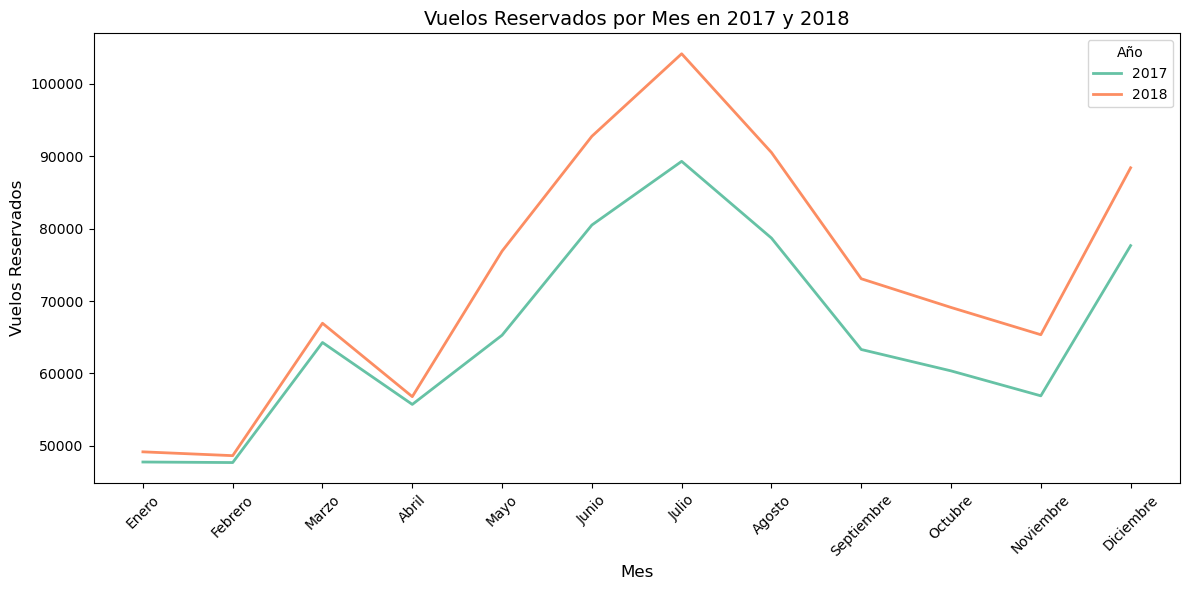

In [44]:
# Usamos Lineplot de Seaborn porque nos permite comparar fácilmente las reservas entre 2017 y 2018 en los mismos meses.
# Agrupar por Año y Mes y sumar los vuelos reservados
monthly_flights = df_limpio.groupby(['Year', 'Month'])['Flights Booked'].sum().reset_index()

# Creamos lineplot con seaborn
plt.figure(figsize=(12, 6))
sns.lineplot(data=monthly_flights, x='Month', y='Flights Booked', hue='Year', palette='Set2', linewidth=2)


# Personalizar el gráfico
plt.title('Vuelos Reservados por Mes en 2017 y 2018', fontsize=14)
plt.xlabel('Mes', fontsize=12)
plt.ylabel('Vuelos Reservados', fontsize=12)
plt.xticks(ticks=range(1, 13), labels=['Enero', 'Febrero', 'Marzo', 'Abril', 'Mayo', 'Junio', 'Julio', 'Agosto', 'Septiembre', 'Octubre', 'Noviembre', 'Diciembre'], rotation=45)
plt.legend(title="Año")

# Mostrar el gráfico
plt.tight_layout()
plt.show()

Podemos apreciar como durante ambos años, la distribución de vuelos reservados por mes es muy similar, habiendo en 2018 una mayor cantidad de vuelos reservados, sobre todo en el periodo comprendido entre Junio y Agosto.

    ¿Existe una relación entre la distancia de los vuelos y los puntos acumulados por los cliente?

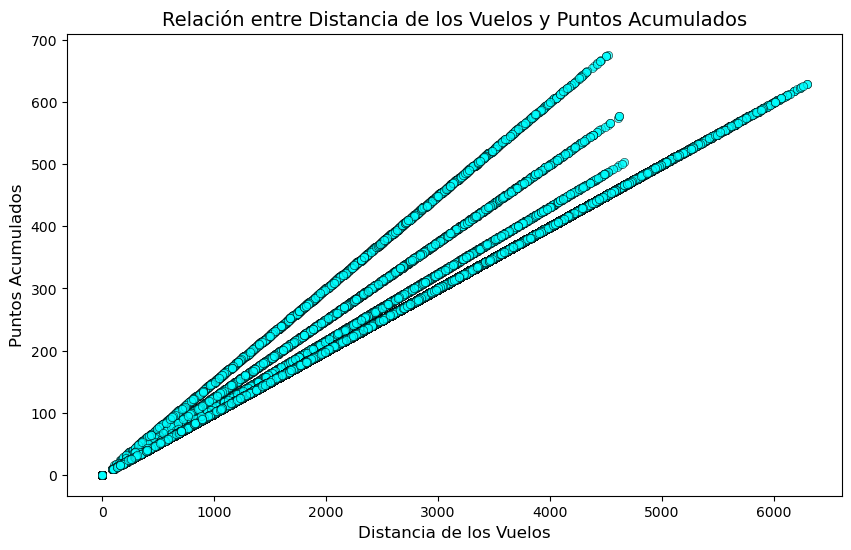

In [46]:
# Para poder analizar la relación entre estas dos variables cuantitativas vamos a usar un scatterplot de Seaborn
plt.figure(figsize=(10, 6))
sns.scatterplot(
    data=df_limpio, 
    x='Distance', 
    y='Points Accumulated', 
    color='cyan', 
    edgecolor='black', 
    alpha=0.7
)

# Personalizamos el gráfico
plt.title('Relación entre Distancia de los Vuelos y Puntos Acumulados', fontsize=14)
plt.xlabel('Distancia de los Vuelos', fontsize=12)
plt.ylabel('Puntos Acumulados', fontsize=12)

# Mostrar el gráfico
plt.show()


Hay una clara relación positiva entre la distancia de los vuelos y los puntos acumulados. Esto significa que a mayor distancia recorrida, los clientes acumulan más puntos.
Este comportamiento es esperado, ya que los programas de lealtad suelen asignar puntos basándose en las millas o kilómetros recorridos.

Observamos que los puntos están organizados en líneas paralelas inclinadas hacia arriba. Esto sugiere que existen diferentes niveles o categorías dentro del programa de puntos:
Por ejemplo, los clientes con niveles superiores (tarjetas premium o mejores beneficios) podrían acumular más puntos por la misma distancia en comparación con los clientes de niveles más básicos.

No parece haber irregularidades significativas o valores atípicos en los datos. Esto refuerza la idea de que el sistema de puntos está funcionando como se espera.

     ¿Cuál es la distribución de los clientes por provincia o estado?

C:\Users\alias\AppData\Local\Temp\ipykernel_7436\251001021.py:7: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(data=clientes_por_provincia, x='Province', y='Client Count', palette='Blues_d')


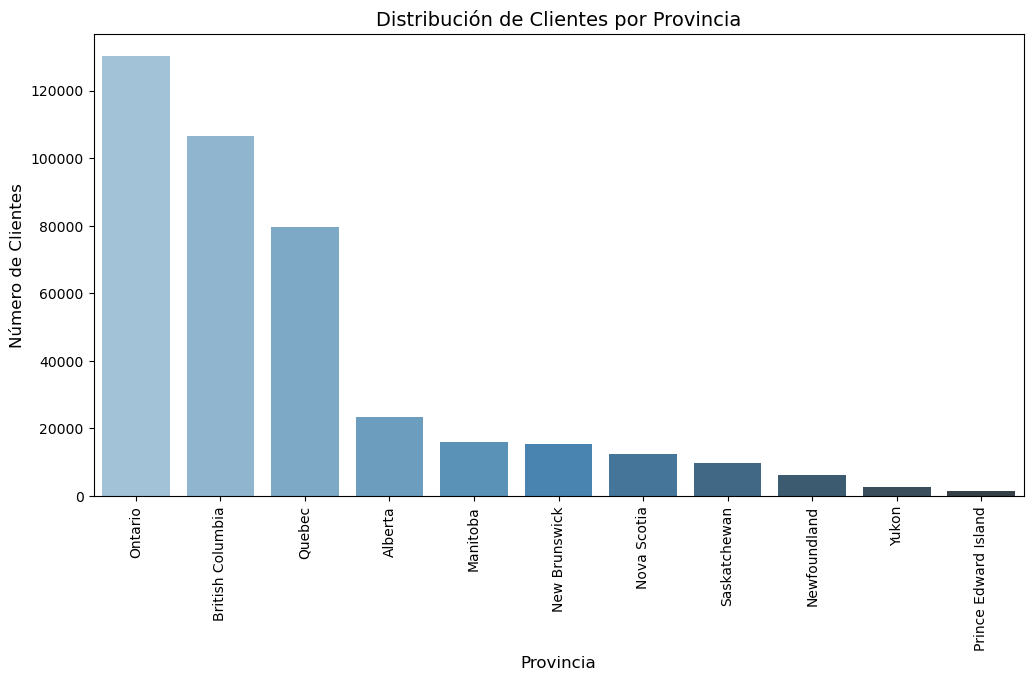

In [47]:
# 
# 1. Distribución de clientes por Provincia
clientes_por_provincia = df_limpio['Province'].value_counts().reset_index()
clientes_por_provincia.columns = ['Province', 'Client Count']

# Creamos un  barplot  con seaborn
plt.figure(figsize=(12, 6))
sns.barplot(data=clientes_por_provincia, x='Province', y='Client Count', palette='Blues_d')

# Personalizar el gráfico
plt.title('Distribución de Clientes por Provincia', fontsize=14)
plt.xlabel('Provincia', fontsize=12)
plt.ylabel('Número de Clientes', fontsize=12)
plt.xticks(rotation=90)
plt.show()

Provincias más destacadas:
- Ontario tiene la mayor cantidad de clientes, con un número significativamente más alto que las demás provincias.Esto podría indicar que esta provincia es el mercado principal para la aerolínea o tiene una mayor población interesada en este programa de lealtad.
- British Columbia y Quebec también tienen un número elevado de clientes, pero están por debajo de Ontario.Esto sugiere que estas provincias también son mercados importantes, pero     menos dominantes.

Provincias con menor cantidad de clientes: 
- Prince Edward Island, Yukon, y Newfoundland tienen un número de clientes muy bajo en comparación con otras provincias. Esto podría deberse a:
    - Una menor población en estas provincias.
    - Menor interés en el programa de lealtad.
    - Menor presencia de la aerolínea o sus servicios.

In [51]:
df_limpio['Country'].unique()

array(['Canada'], dtype=object)

No haremos gráfica por estado, ya que todas las 
provincias de nuestra tabla pertenecen a Canada.

    Calcular el salario promedio por nivel educativo

C:\Users\alias\AppData\Local\Temp\ipykernel_7068\1461332967.py:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(data=df_limpio, x='Education', y='Salary', palette='Greens')


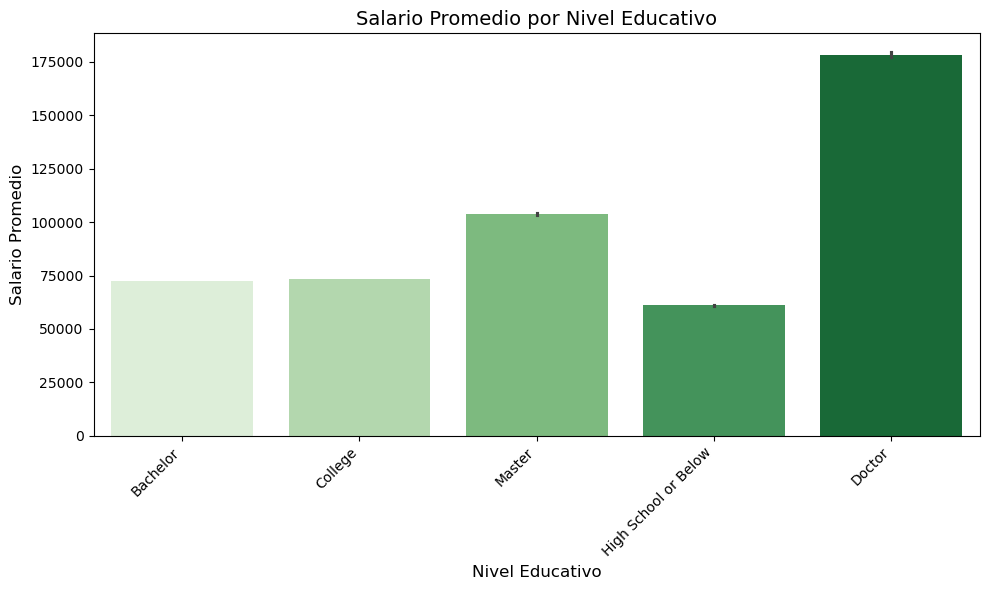

In [47]:
# Usamos un barplot para mostrar la relación entre el nivel educativo y el salario promedio de los clientes
# Crearmos barplot con seaborn
plt.figure(figsize=(10, 6))
sns.barplot(data=df_limpio, x='Education', y='Salary', palette='Greens')

# Personalizar el gráfico
plt.title('Salario Promedio por Nivel Educativo', fontsize=14)
plt.xlabel('Nivel Educativo', fontsize=12)
plt.ylabel('Salario Promedio', fontsize=12)
plt.xticks(rotation=45, ha='right')  # Rotar etiquetas para mejor legibilidad

# Mostrar el gráfico
plt.tight_layout()
plt.show()

Doctor: Tiene el salario promedio más alto, destacándose significativamente sobre los demás niveles educativos.

Master: También muestra un salario promedio alto, pero bastante menor que el de Doctor.

Bachelor y College: Tienen salarios promedio similares, por lo que no hay mucha diferencia entre estos niveles educativos.

High School or Below: Es el nivel educativo con el salario promedio más bajo, como era de esperar.

En este gráfico, vemos que los errores estándar son pequeños, lo que indica que los salarios dentro de cada nivel educativo no varían demasiado.


    ¿Cuál es la proporción de clientes con diferentes tipos de tarjetas de fidelidad?


In [49]:
# Diferentes tipos de tarjeta
df_limpio['Loyalty Card'].unique()


array(['Aurora', 'Nova', 'Star'], dtype=object)

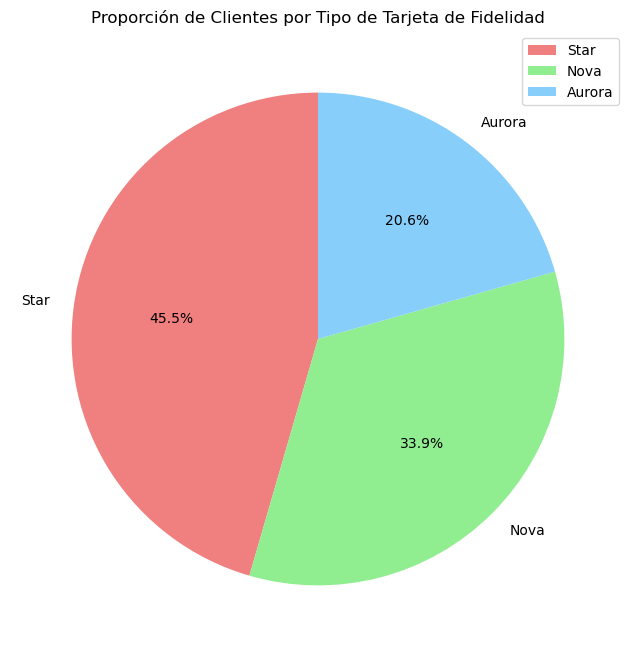

In [50]:
# Usamos un pieplot para visualizar la proporción de clientes con diferentes tipos de tarjetas de fidelidad

proporcion_tarjetas = df_limpio['Loyalty Card'].value_counts()
plt.figure(figsize=(8, 8))
proporcion_tarjetas.plot(kind='pie', autopct='%1.1f%%', colors=['lightcoral', 'lightgreen', 'lightskyblue'], startangle=90, legend=True)
plt.title('Proporción de Clientes por Tipo de Tarjeta de Fidelidad')
plt.ylabel('')  # Eliminar etiqueta de y-axis
plt.show()


- La tarjeta Star es la más común, representando el 45.5% de todos los clientes.

- La tarjeta Nova ocupa el segundo lugar, representando el 33.9% de los clientes.

- La tarjeta Aurora es la menos común, con solo el 20.6% de los clientes.

    ¿Cómo se distribuyen los clientes según su estado civil y género?


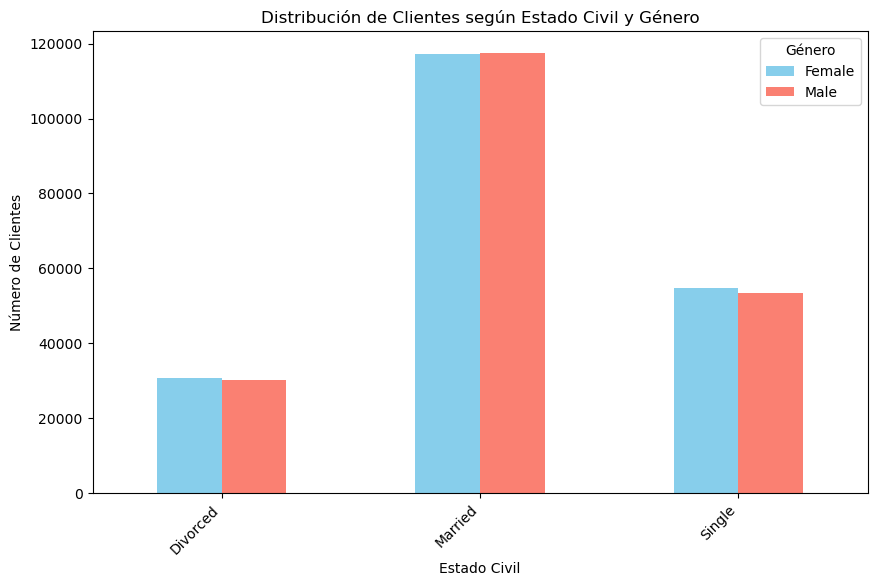

In [52]:
# Usamos un crosstab porque nos permite visualizar fácilmente la relación entre dos variables categóricas en un gráfico de barras agrupadas.

pd.crosstab(df_limpio['Marital Status'], df_limpio['Gender']).plot(
    kind='bar', 
    color=['skyblue', 'salmon'], 
    figsize=(10, 6)
)

# Etiquetas y título
plt.title('Distribución de Clientes según Estado Civil y Género')
plt.xlabel('Estado Civil')
plt.ylabel('Número de Clientes')
plt.xticks(rotation=45, ha='right')
plt.legend(title='Género')
plt.show()

- La categoría "Married" domina el total de clientes, mostrando que la mayoría de los clientes están casados.
- Las diferencias entre géneros dentro de cada categoría son mínimas, lo que indica una distribución relativamente equitativa.
- La categoría "Divorced" es la que tiene menor cantidad de clientes.

In [53]:
# creamos  la tabla de contingencia usando el método crosstab de pandas
tabla_contingencia = pd.crosstab(df_limpio['Marital Status'], df_limpio['Gender']) 

# Interpretación: La tabla de contingencia muestra cuántos clientes pertenecen a cada combinación de nivel de educación y estado civil.
tabla_contingencia


Gender,Female,Male
Marital Status,,
Divorced,30634,30128
Married,117363,117482
Single,54760,53393


    BONUS Fase 3: Evaluación de Diferencias en Reservas de Vuelos por Nivel Educativo
    
     Utilizando un conjunto de datos que hemos compartido, se busca evaluar si existen diferencias significativas en el número de vuelos reservados según el nivel educativo de los clientes. Para ello, los pasos que deberas seguir son:

     - Preparación de Datos: Filtra el conjunto de datos para incluir únicamente las columnas relevantes: 'Flights Booked' y 'Education'.

In [61]:
# Filtrar las columnas relevantes
df_education_flight = df_limpio[['Education', 'Flights Booked']]

# Verificar los datos
df_education_flight.head()


,Education,Flights Booked
0,Bachelor,3
1,College,10
2,College,6
3,Bachelor,0
4,Bachelor,0


    Análisis Descriptivo: Agrupa los datos por nivel educativo y calcula estadísticas descriptivas básicas (como el promedio, la desviación estandar) del número de vuelos reservados para cada grupo.

In [64]:
# Calcular estadísticas descriptivas por nivel educativo
estadisticas_descriptivas = df_education_flight.groupby('Education')['Flights Booked'].agg(['mean', 'std', 'count'])

# Mostrar las estadísticas descriptivas
estadisticas_descriptivas.T


Education,Bachelor,College,Doctor,High School or Below,Master
mean,4.110288,4.169744,4.175512,4.176209,4.200700
std,5.221671,5.246040,5.256971,5.239267,5.213956
count,252567.000000,102260.000000,17731.000000,18915.000000,12287.000000
